In [1]:
!git clone https://github.com/Bastagnan/Data-Challenge-SiS.git

Cloning into 'Data-Challenge-SiS'...
remote: Enumerating objects: 111, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 111 (delta 44), reused 68 (delta 24), pack-reused 22 (from 1)
Receiving objects: 100% (111/111), 80.39 MiB | 37.15 MiB/s, done.
Resolving deltas: 100% (46/46), done.


In [1]:
import torch 

print(torch.__version__)

2.5.1+cu121


In [2]:
!pip uninstall -y torch torchvision torchaudio
!pip install torch==2.4.0 torchvision==0.19.0 torchaudio==2.4.0 --index-url https://download.pytorch.org/whl/cu121


Found existing installation: torch 2.5.1+cu121
Uninstalling torch-2.5.1+cu121:
  Successfully uninstalled torch-2.5.1+cu121
Found existing installation: torchvision 0.20.1+cu121
Uninstalling torchvision-0.20.1+cu121:
  Successfully uninstalled torchvision-0.20.1+cu121
Found existing installation: torchaudio 2.5.1+cu121
Uninstalling torchaudio-2.5.1+cu121:
  Successfully uninstalled torchaudio-2.5.1+cu121
Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 799.1/799.1 MB 2.2 MB/s eta 0:00:000:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 3.3 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 83.6 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 65.3 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 44.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 75.7 MB/s eta 0:00:00:00:0100:0

In [3]:
!pip install  dgl -f https://data.dgl.ai/wheels/torch-2.4/cu121/repo.html

Looking in links: https://data.dgl.ai/wheels/torch-2.4/cu121/repo.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 355.2/355.2 MB 4.8 MB/s eta 0:00:000:00:0100:01


In [7]:
!pip install git+https://github.com/openai/CLIP.git


  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-uo11604q
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-uo11604q
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.7 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369489 sha256=304bc540b3b3328a0d1e56e190cdd65277cf066c0fb862c2e6a54fe1ef8baaab
  Stored in directory: /tmp/pip-ephem-wheel-cache-3sfezdye/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip


In [4]:
import sys

# Make sure we add the directory containing Text_to_Motion_pipeline.py
sys.path.append("/kaggle/working/Data-Challenge-SiS/Model")
print(sys.path)  # see if the path was added


['/kaggle/working', '/kaggle/lib/kagglegym', '/kaggle/lib', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.10/dist-packages/IPython/extensions', '/usr/local/lib/python3.10/dist-packages/setuptools/_vendor', '/root/.ipython', '/kaggle/working/Data-Challenge-SiS/Model']


In [8]:
from Text_to_Motion_pipeline import Text2MotionPipeline, train
# Then also import your MLP and CLIP if needed for direct usage
from Motion_predictor.MLP import MLP
from Motion_predictor.GC_LSTM import GraphConvLSTM
from Motion_predictor.GC_GRU import GraphConvGRU
from Text_encoder.CLIP import CLIPTextEncoder


motion_dim = 100 * 22 * 3  # for example

model = Text2MotionPipeline(
    Text_Encoder=CLIPTextEncoder,
    Motion_predictor=GraphConvLSTM,
    vocab_size=128,
    embed_dim=32,
    motion_dim=motion_dim
)

train(
    model=model,
    data_dir='/kaggle/input/motion', 
    num_epochs=20,
    batch_size=16,
    lr=1e-3,
    n_frames=100,
    n_joints=22
)


DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


100%|████████████████████████████████████████| 338M/338M [00:02<00:00, 141MiB/s]
Epoch 1/20:   0%|          | 0/814 [00:00<?, ?it/s]


RuntimeError: The size of tensor a (16) must match the size of tensor b (22) at non-singleton dimension 0

In [6]:
from predict_and_submit import predict_and_submit

predict_and_submit(model,
                data_dir="/kaggle/input/motion",
                test_file="test.txt",
                output_csv="/kaggle/working/submission.csv")

loading data...: 100%|██████████| 1000/1000 [00:03<00:00, 300.81it/s]


Saved submission to: /kaggle/working/submission.csv


,id,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_6590,f_6591,f_6592,f_6593,f_6594,f_6595,f_6596,f_6597,f_6598,f_6599
0,011645,-0.000580,0.895906,0.002598,0.067004,0.808486,-0.001444,-0.065737,0.796159,-0.009294,...,0.066652,-0.211870,1.075976,0.058986,0.213200,0.998861,0.150634,-0.223398,0.990799,0.154299
1,M008704,-0.000375,0.766662,-0.005693,0.056219,0.681983,0.000764,-0.061298,0.682877,-0.004291,...,0.048778,-0.169151,0.858193,0.048498,0.162970,0.794510,0.108197,-0.176055,0.776830,0.130566
2,M011136,-0.005464,0.960594,-0.002664,0.064359,0.891533,-0.006951,-0.063812,0.850508,-0.016275,...,0.605238,-0.172613,1.149607,0.585464,0.163424,0.989028,0.666148,-0.178711,0.962287,0.669286
3,M009730,-0.000217,0.896118,-0.007491,0.058004,0.834520,-0.003182,-0.059932,0.815624,-0.010095,...,0.085728,-0.228239,1.142619,0.077452,0.223227,1.117843,0.175365,-0.245474,1.076769,0.178297
4,003104,-0.008926,0.905076,-0.004116,0.063264,0.809663,-0.003438,-0.055727,0.808022,-0.007741,...,0.631599,-0.154537,1.047432,0.634598,0.148569,0.923954,0.705552,-0.183460,0.902813,0.704723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,003897,0.000547,0.684306,-0.001022,0.050262,0.607733,-0.021411,-0.059991,0.630998,-0.023145,...,0.661119,-0.059602,0.722567,0.697382,0.064171,0.567644,0.734802,-0.080199,0.544163,0.742556
996,010110,-0.000377,0.937401,0.000575,0.068648,0.857873,-0.007784,-0.062448,0.845514,-0.014306,...,0.219141,-0.184469,1.131505,0.208482,0.177922,0.990961,0.294058,-0.184814,0.976800,0.294586
997,M005747,-0.007578,0.952895,-0.003403,0.064436,0.875803,-0.001180,-0.059057,0.846719,-0.012378,...,0.364927,-0.183939,1.134117,0.352338,0.186028,1.025274,0.445266,-0.194196,0.985688,0.448091
998,M008461,-0.005849,0.932887,0.003093,0.067130,0.826133,-0.003731,-0.045583,0.836261,-0.017106,...,1.594973,-0.121468,1.075232,1.600686,0.100244,0.857209,1.613485,-0.157042,0.871163,1.630921


In [13]:
! mkdir /kaggle/working/GIFS

In [32]:
from animation_demo import plot_3d_motion
from predict_and_submit import predict
import random

ids, texts, motions = predict( model,
                        data_dir="/kaggle/input/motion",
                        test_file="test.txt")

for i in range(5):
    save_path = f'/kaggle/working/GIFS/animation_{ids[i]}.gif'
    title = random.choice(texts[i])
    title  = title.split('#')[0]
    plot_3d_motion(save_path, motions[i], title=title, figsize=(10, 6), fps=30, radius=4)

loading data...: 100%|██████████| 1000/1000 [00:01<00:00, 572.06it/s]


Animation saved to /kaggle/working/GIFS/animation_011645.gif!
Animation saved to /kaggle/working/GIFS/animation_M008704.gif!
Animation saved to /kaggle/working/GIFS/animation_M011136.gif!
Animation saved to /kaggle/working/GIFS/animation_M009730.gif!
Animation saved to /kaggle/working/GIFS/animation_003104.gif!



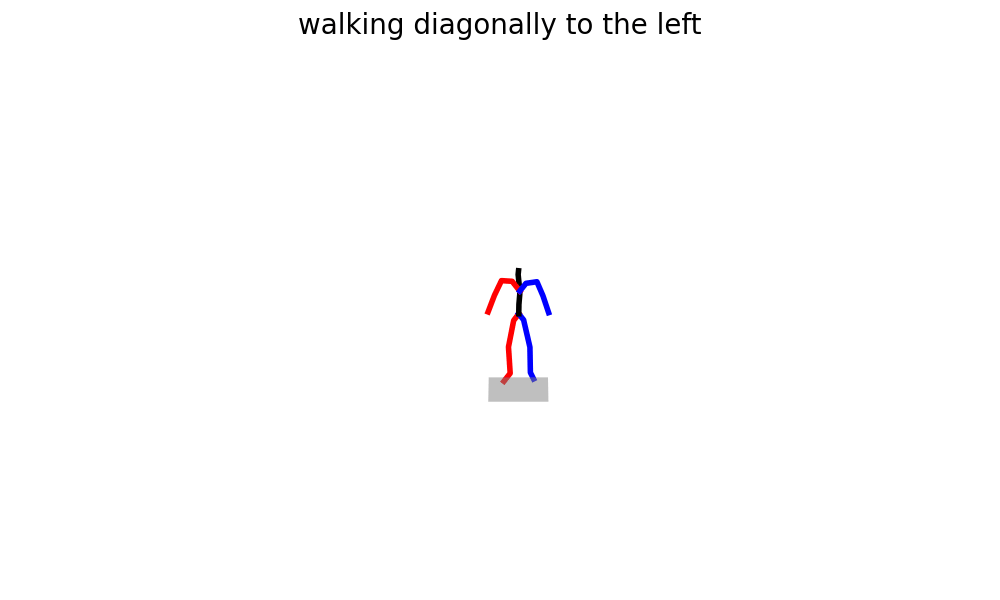

In [34]:
import base64
from IPython.display import HTML

def gif_view(gif_path):
    def gif_to_html(gif_path):
        with open(gif_path, 'rb') as f:
            encoded = base64.b64encode(f.read()).decode('utf-8')
        return f'<img src="data:image/gif;base64,{encoded}">'
    return HTML(gif_to_html(gif_path))


gif_view("/kaggle/working/GIFS/animation_M011136.gif")